In [1]:
from data import *
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
test_transform = T.Compose([
    ToTensor(),
    RandomVerticalFlip(0.4),
    RandomHorizontalFlip(0.4),
    RandomRot90(0.2),
    RandomRotate(0.3, 30)
])
test_dataset = CTSliceDataset('train', 128, transform=test_transform)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=1)

In [57]:
def patch(x, patch_factor):
    print(x.shape)
    patch_size = (x.shape[-2] // patch_factor, x.shape[-1] // patch_factor)
    patched = torch.zeros((x.shape[0]*patch_factor**2,x.shape[1],*patch_size))
    for i in range(x.shape[0]): 
        j = 0
        for k in range(patch_factor**2):
            patch = (
                k % patch_factor * patch_size[0],
                k % patch_factor * patch_size[0] + patch_size[0],
                j * patch_size[1],
                j * patch_size[1] + patch_size[1]
            )
            print(i,patch,k)
            patched[i+k*patch_factor**2] = x[i,0,patch[0]:patch[1],patch[2]:patch[3]]
            if (k + 1) % patch_factor == 0:
                j += 1
            if j == patch_factor:
                j = 0
    return patched


torch.Size([4, 1, 128, 128])
0 (0, 64, 0, 64) 0
0 (64, 128, 0, 64) 1
0 (0, 64, 64, 128) 2
0 (64, 128, 64, 128) 3
1 (0, 64, 0, 64) 0
1 (64, 128, 0, 64) 1
1 (0, 64, 64, 128) 2
1 (64, 128, 64, 128) 3
2 (0, 64, 0, 64) 0
2 (64, 128, 0, 64) 1
2 (0, 64, 64, 128) 2
2 (64, 128, 64, 128) 3
3 (0, 64, 0, 64) 0
3 (64, 128, 0, 64) 1
3 (0, 64, 64, 128) 2
3 (64, 128, 64, 128) 3
torch.Size([16, 1, 64, 64])


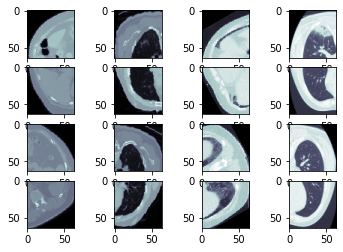

torch.Size([4, 1, 128, 128])
0 (0, 64, 0, 64) 0
0 (64, 128, 0, 64) 1
0 (0, 64, 64, 128) 2
0 (64, 128, 64, 128) 3
1 (0, 64, 0, 64) 0
1 (64, 128, 0, 64) 1
1 (0, 64, 64, 128) 2
1 (64, 128, 64, 128) 3
2 (0, 64, 0, 64) 0
2 (64, 128, 0, 64) 1
2 (0, 64, 64, 128) 2
2 (64, 128, 64, 128) 3
3 (0, 64, 0, 64) 0
3 (64, 128, 0, 64) 1
3 (0, 64, 64, 128) 2
3 (64, 128, 64, 128) 3
torch.Size([16, 1, 64, 64])


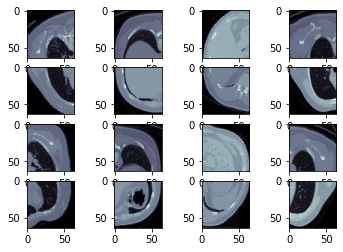

torch.Size([4, 1, 128, 128])
0 (0, 64, 0, 64) 0
0 (64, 128, 0, 64) 1
0 (0, 64, 64, 128) 2
0 (64, 128, 64, 128) 3
1 (0, 64, 0, 64) 0
1 (64, 128, 0, 64) 1
1 (0, 64, 64, 128) 2
1 (64, 128, 64, 128) 3
2 (0, 64, 0, 64) 0
2 (64, 128, 0, 64) 1
2 (0, 64, 64, 128) 2
2 (64, 128, 64, 128) 3
3 (0, 64, 0, 64) 0
3 (64, 128, 0, 64) 1
3 (0, 64, 64, 128) 2
3 (64, 128, 64, 128) 3
torch.Size([16, 1, 64, 64])


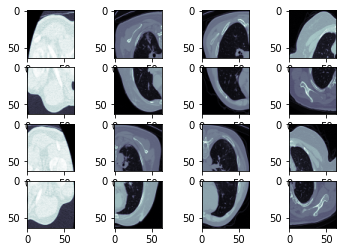

torch.Size([4, 1, 128, 128])
0 (0, 64, 0, 64) 0
0 (64, 128, 0, 64) 1
0 (0, 64, 64, 128) 2
0 (64, 128, 64, 128) 3
1 (0, 64, 0, 64) 0
1 (64, 128, 0, 64) 1
1 (0, 64, 64, 128) 2
1 (64, 128, 64, 128) 3
2 (0, 64, 0, 64) 0
2 (64, 128, 0, 64) 1
2 (0, 64, 64, 128) 2
2 (64, 128, 64, 128) 3
3 (0, 64, 0, 64) 0
3 (64, 128, 0, 64) 1
3 (0, 64, 64, 128) 2
3 (64, 128, 64, 128) 3
torch.Size([16, 1, 64, 64])


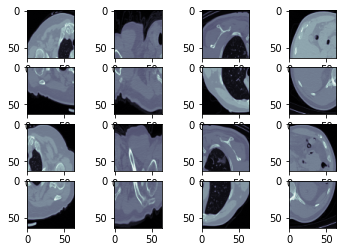

In [58]:
patch_factor = 2
for i, x in enumerate(test_dataloader):
    ct_image = x['ct_scan']
    ct_image_patched = patch(ct_image, patch_factor)
    print(ct_image_patched.shape)
    fig, axes = plt.subplots(ct_image.shape[0],patch_factor**2)
    for j, ax in enumerate(axes.flatten()):
        ax.imshow(ct_image_patched[j,0],cmap='bone')
    plt.show()
    if i > 2:
        break
